In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [2]:

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, 
                   names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
                          'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

print(data.shape)

(32561, 15)


In [3]:

data = data.replace('?', np.nan)  # Replace missing values represented by '?' with NaN
data = data.replace(' ', np.nan)
data = data.dropna(how='all')  # Drop rows containing NaN values
print(data.shape)


(32561, 15)


In [4]:

data = data.drop(['fnlwgt'], axis=1)

# Convert categorical variables into numerical ones using one-hot encoding
data = pd.get_dummies(data, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'education', 'race', 'sex', 'native-country'])

# Transform the target variable 'income' into a binary variable
data['income'] = data['income'].apply(lambda x: 0 if x==' <=50K' else 1)


In [5]:
data.isnull().sum()

age                                0
education-num                      0
capital-gain                       0
capital-loss                       0
hours-per-week                     0
                                  ..
native-country_ Thailand           0
native-country_ Trinadad&Tobago    0
native-country_ United-States      0
native-country_ Vietnam            0
native-country_ Yugoslavia         0
Length: 108, dtype: int64

In [6]:
data.income.value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

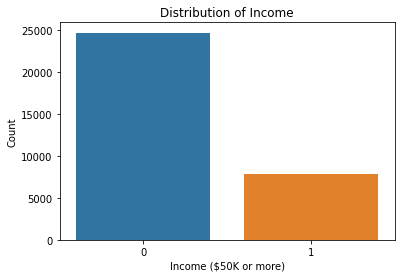

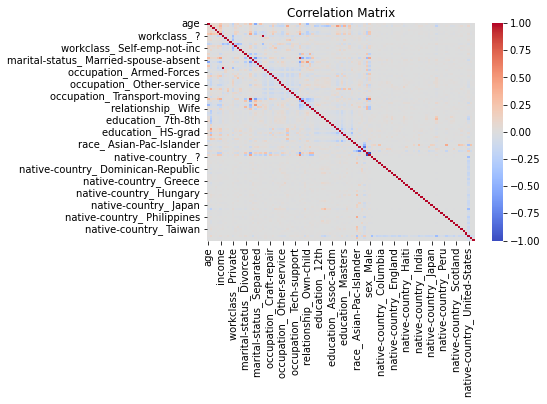

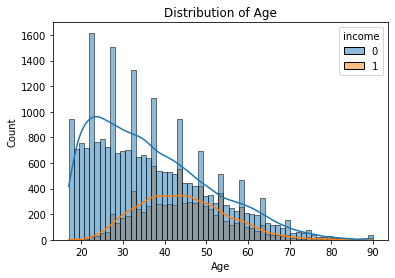

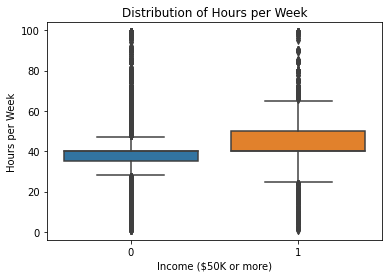

In [7]:


# Plot the distribution of the target variable
sns.countplot(x='income', data=data)
plt.xlabel('Income ($50K or more)')
plt.ylabel('Count')
plt.title('Distribution of Income')
plt.show()

# Plot the correlation matrix of the input features
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Plot the distribution of the age variable
sns.histplot(x='age', hue='income', data=data, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

# Plot the boxplot of the hours-per-week variable
sns.boxplot(x='income', y='hours-per-week', data=data)
plt.xlabel('Income ($50K or more)')
plt.ylabel('Hours per Week')
plt.title('Distribution of Hours per Week')
plt.show()

In [8]:
# Split the dataset into training and testing sets

# Split the dataset into input features and target variable
X = data.drop('income', axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features using standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4942
           1       0.75      0.61      0.68      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513

[[4622  320]
 [ 607  964]]


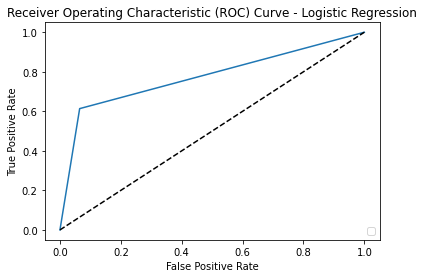

In [9]:

# Train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Generate predictions for logistic regression model
y_pred_logreg = log_reg.predict(X_test)

# Print classification report, confusion matrix, and ROC curve for logistic regression model
print('Logistic Regression Model:')
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


naive bayes model Model:
              precision    recall  f1-score   support

           0       0.98      0.25      0.39      4942
           1       0.29      0.98      0.45      1571

    accuracy                           0.42      6513
   macro avg       0.63      0.61      0.42      6513
weighted avg       0.81      0.42      0.41      6513

[[1215 3727]
 [  30 1541]]


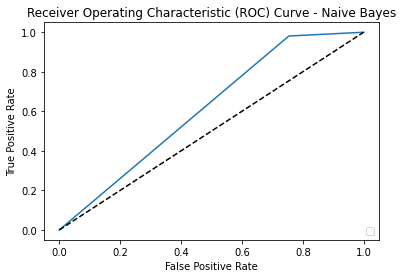

In [10]:

# Train naive bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Generate predictions for naive bayes model
y_pred_nb = nb.predict(X_test)

# Print classification report, confusion matrix, and ROC curve for logistic regression model
print('naive bayes model Model:')
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


LDA Model:
[[4586  356]
 [ 674  897]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4942
           1       0.72      0.57      0.64      1571

    accuracy                           0.84      6513
   macro avg       0.79      0.75      0.77      6513
weighted avg       0.83      0.84      0.84      6513



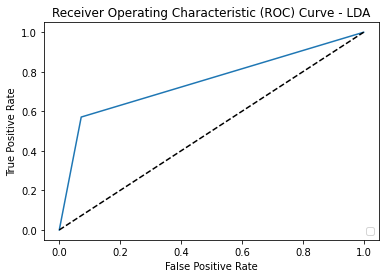

In [11]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

print('LDA Model:')
print(confusion_matrix(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lda)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - LDA')
plt.legend(loc="lower right")
plt.show()


/usr/local/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


QDA Model:
[[2741 2201]
 [ 465 1106]]
              precision    recall  f1-score   support

           0       0.85      0.55      0.67      4942
           1       0.33      0.70      0.45      1571

    accuracy                           0.59      6513
   macro avg       0.59      0.63      0.56      6513
weighted avg       0.73      0.59      0.62      6513



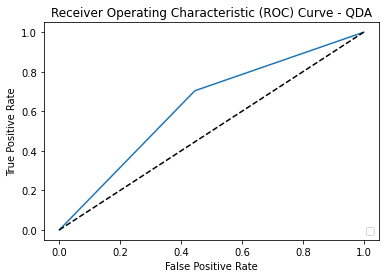

In [12]:
#qda
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

print('QDA Model:')
print(confusion_matrix(y_test, y_pred_qda))
print(classification_report(y_test, y_pred_qda))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_qda)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - QDA')
plt.legend(loc="lower right")
plt.show()